# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To supress warnings
import warnings

# date time
from datetime import datetime

warnings.filterwarnings("ignore")


## Loading the dataset

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BankChurners.csv")

## Data Overview

In [7]:
df.shape


(10127, 21)

In [8]:
data = df.copy()

In [9]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [10]:

data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
data.duplicated().sum()

0

In [13]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [ ]:
data.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    6
Marital_Status     3
Income_Category    6
Card_Category      4
dtype: int64

- Observations
There are 21 columns and 10,127 observations in the dataset
We can see that Education_Level and Marital_Status have less than 10,127 non-null values(columns have missing values)

- Sanity checks
Duplicates were removed, missing data dealt with, unique columns

## Exploratory Data Analysis (EDA)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


Mean value for the Customer Age column is  46 and the median is also 46. Majority of the customers are under 46 years
Dependent Count column has mean and median of 2.3
Months on Book column has mean and median of 36 months. Minimum value is 13 months. This mean data for customers with the bank is at least 1
Total Relationship Count has mean and median of 4
Credit Limit has a wide range of 1.4K to 34.5K, the mean is  8.6K
Total Transaction Count has mean of 65 and median of 67

In [14]:
data.describe(include="object").T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [16]:

cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


There is imbalance in the dataset
9436 customers have Blue Card
Income Category has a "abc" for 1112

In [17]:
data.drop(columns=["CLIENTNUM"], inplace=True)

Doppped ID Column, treated missing values in Education Level and Marital Status

In [18]:
data["Education_Level"] = data["Education_Level"].fillna("Unknown")
data["Marital_Status"] = data["Marital_Status"].fillna("Unknown")

Dealt with abc

In [19]:
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

In [ ]:
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Converted the data type of the category variables from object/float to category

In [21]:
category_columns = data.select_dtypes(include="object").columns.tolist()

In [22]:
data[category_columns] = data[category_columns].astype("category")

standardized column names to make it clear

In [23]:
data.columns = [i.replace(" ", "_").lower() for i in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

Built feature summary

In [24]:
def box_plot(data: pd.DataFrame, numeric_columns, target, include_outliers):
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="magma",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title(str(i + 1) + ": " + target + " vs. " + col, color="blue")

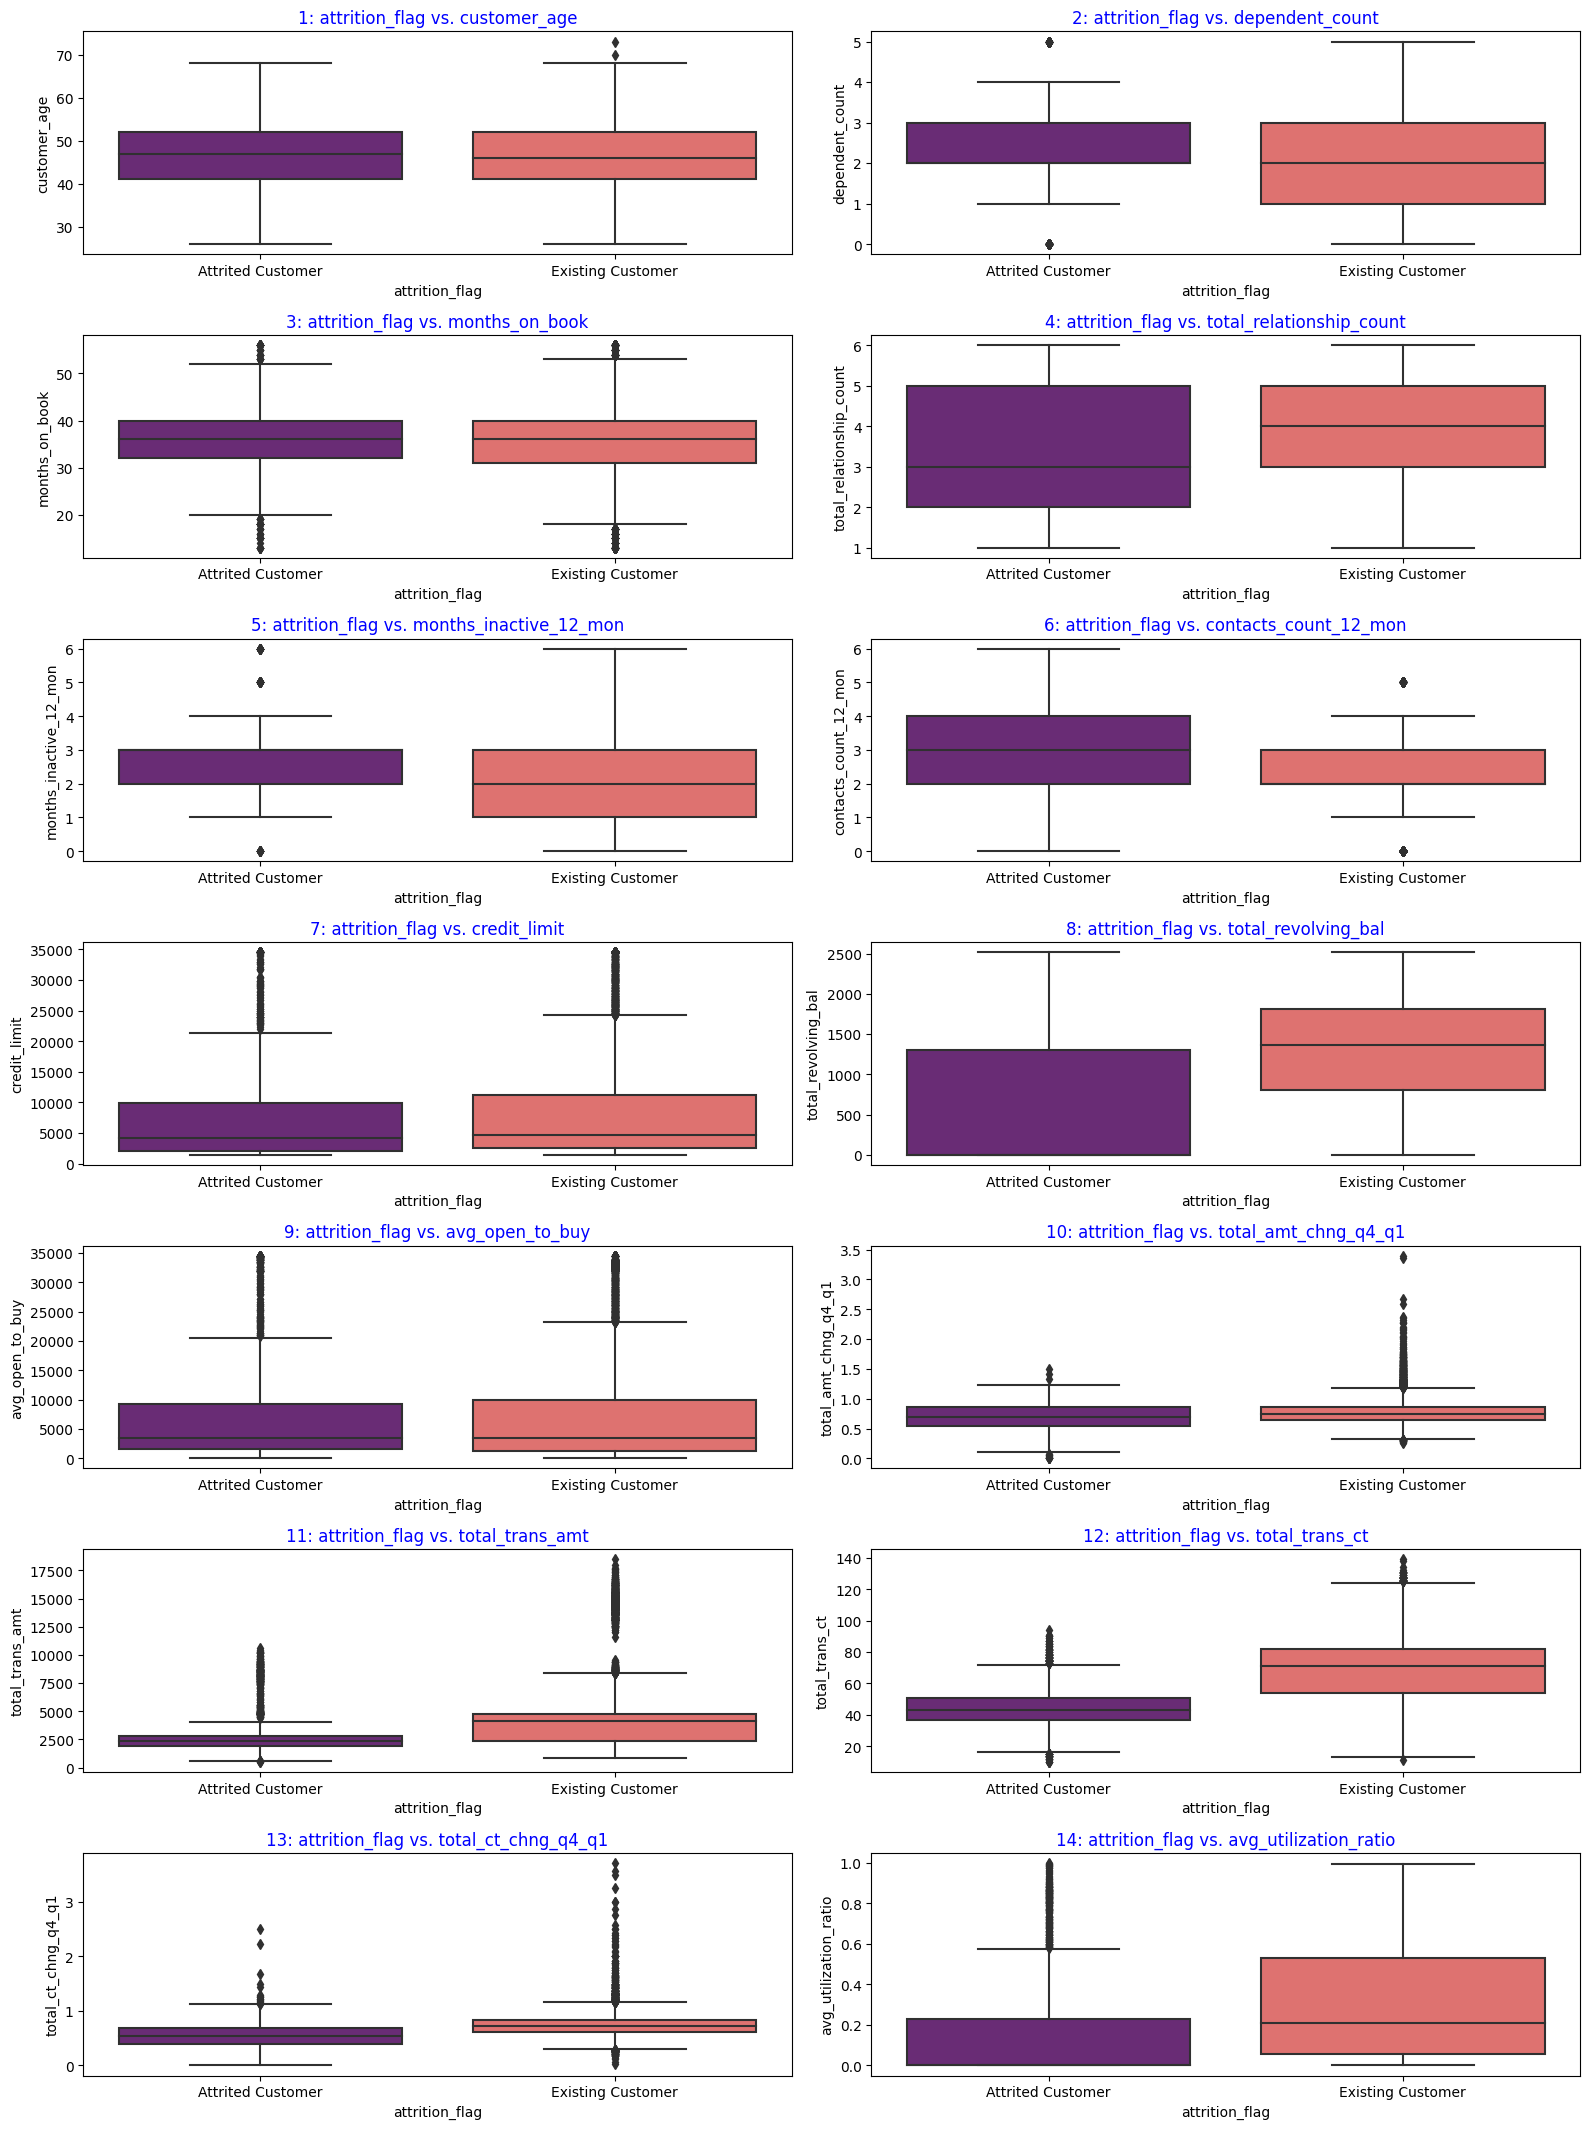

In [25]:
num_col = data.select_dtypes(exclude="category").columns.tolist()
target_variable = "attrition_flag"
box_plot(data, num_col, target_variable, True)

Normalized the data

In [26]:
data[data["credit_limit"] > 23000]["income_category"].value_counts(normalize=True)

$80K - $120K     0.421
$120K +          0.302
$60K - $80K      0.156
Unknown          0.110
$40K - $60K      0.012
Less than $40K   0.000
Name: income_category, dtype: float64

Built categorical features and bar charts

In [27]:


def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):

    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index
        ax=sns.countplot(data=data, x=col, palette = 'magma', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='blue', fontsize='medium');
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

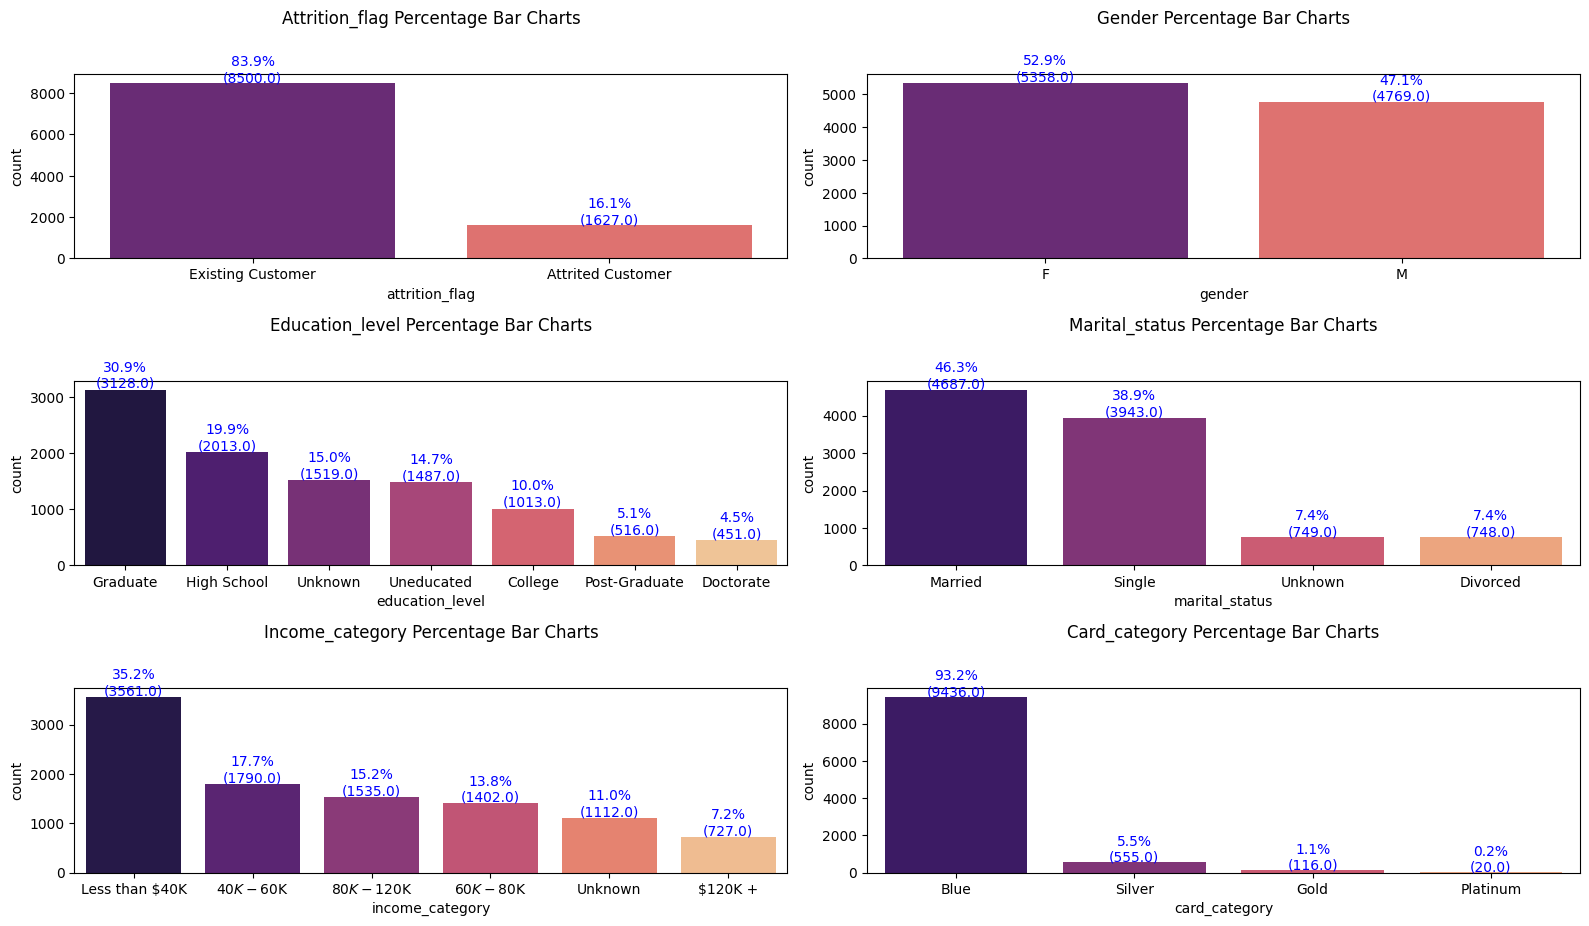

In [28]:
category_columns = data.select_dtypes(include="category").columns.tolist()
target_variable = "attrition_flag"
perc_on_bar(data, category_columns, target_variable)

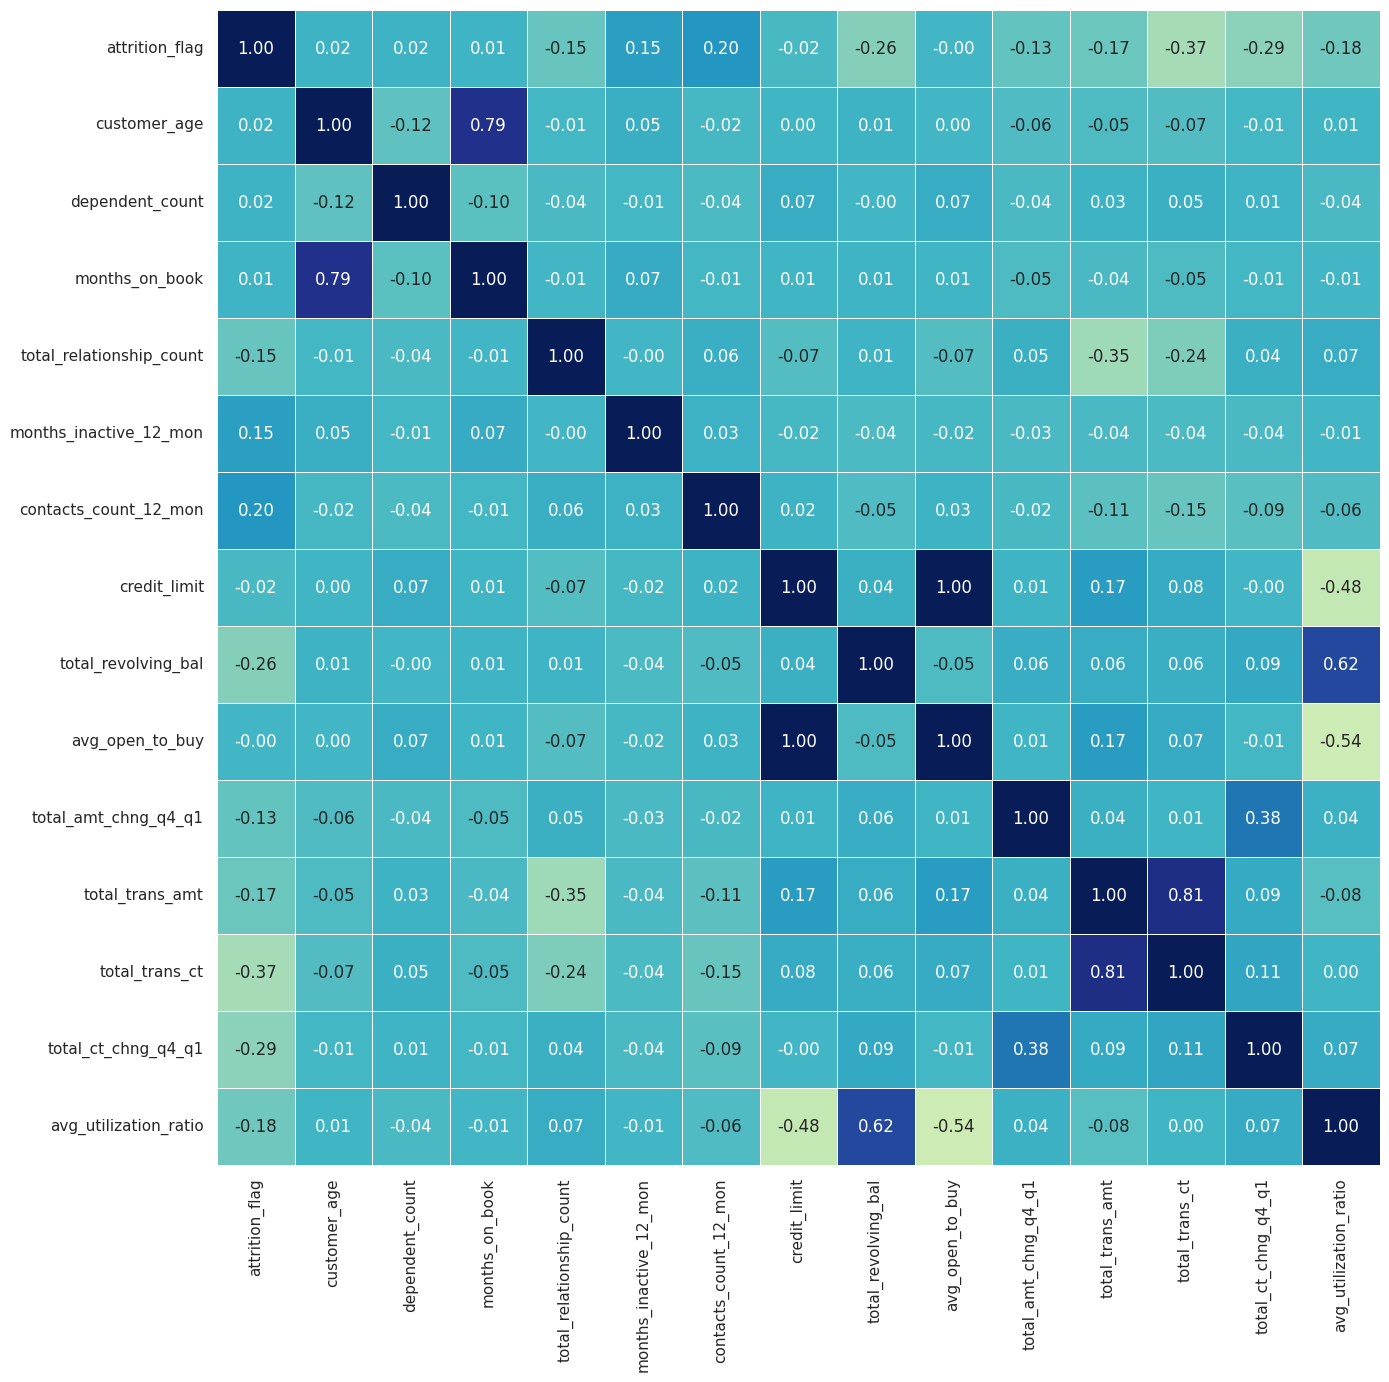

In [29]:
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = data.copy()
data_clean['attrition_flag'] = data_clean['attrition_flag'].map(codes).astype(int)


sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data_clean.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

**Questions**:

1. How is the total transaction amount distributed? Existing customers have more
2. What is the distribution of the level of education of customers? Most have a high school or graduate degree (more than 50%)
3. What is the distribution of the level of income of customers? (52.9%)
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)? Existing customers had more change
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)? Existing customers were more inative than new ones
6. What are the attributes that have a strong correlation with each other? Most cardholders are women, who have platinum cards. Men are about 47% and have platinum cards. Almost half are married and less than 40% are not


#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [32]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [33]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Data Pre-processing

In [34]:
# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)

    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')

    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_


# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_



# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_


# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_

# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_


In [35]:
df = data.copy()
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
attrition_flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
education_level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000
total_relationship_count,10127.000,NaN,NaN,NaN,3.813,1.554,1.000,3.000,4.000,5.000,6.000


## Missing value imputation




Done above

## Model Building

Splitting the data

In [36]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
df[cat_columns] = df[cat_columns].astype("category")

In [46]:
from sklearn.model_selection import train_test_split

X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    x, y, test_size=test_size, random_state=seed, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=val_size, random_state=seed, stratify=y_train_temp
)

print("Training data shape:\n", X_train.shape,
      "\n\nValidation Data Shape:\n", X_val.shape,
      "\n\nTesting Data Shape:\n", X_test.shape)


NameError: ignored

In [37]:
plt.figure(figsize=(20, 20))
sns.set(palette="magma")
sns.pairplot(data=data, hue="attrition_flag", corner=True)

Output hidden; open in https://colab.research.google.com to view.

In [38]:
from matplotlib.axis import YAxis
X_temp, X_test, y_temp, y_test = train_test_split(
    X_temp, y_temp, test_size=test_size, random_state=seed, stratify=y
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,)

NameError: ignored

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [43]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 4 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(x_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:



NameError: ignored

### Model Building with Oversampled data


In [41]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

NameError: ignored

### Model Building with Undersampled data

In [44]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

NameError: ignored

### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For Logistic Regression:

```
param_grid = {'C': np.arange(0.1,1.1,0.1)}

```
- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Sample tuning method for Decision tree with original data

In [47]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

NameError: ignored

#### Sample tuning method for Decision tree with oversampled data

In [48]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

NameError: ignored

#### Sample tuning method for Decision tree with undersampled data

In [49]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

NameError: ignored

## Model Comparison and Final Model Selection

### Test set final performance

## Pipelines to build the final model


# Business Insights and Conclusions

***